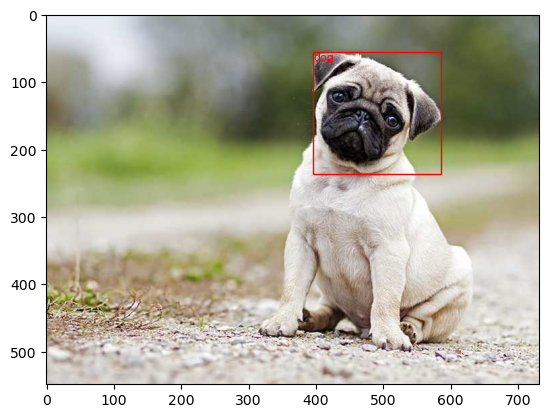

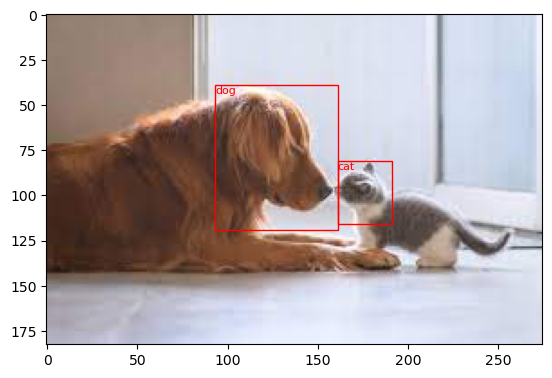

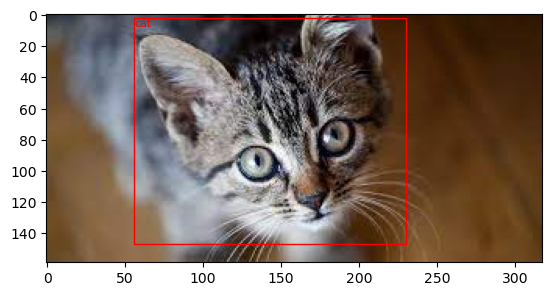

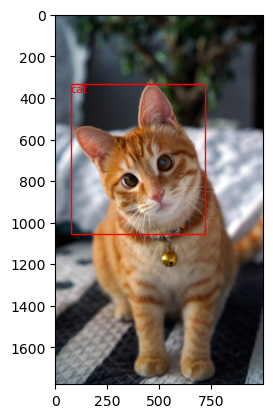

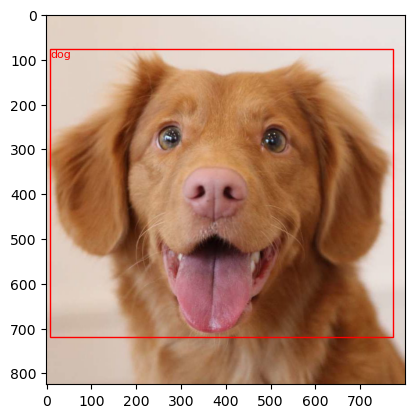

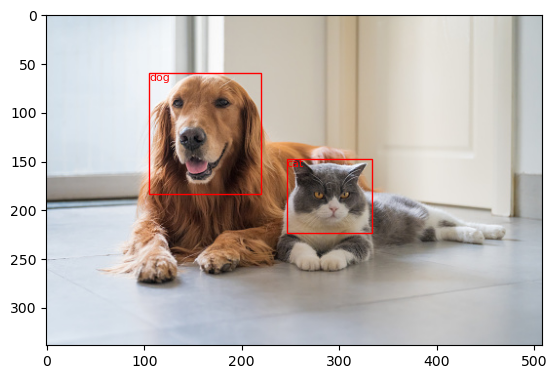

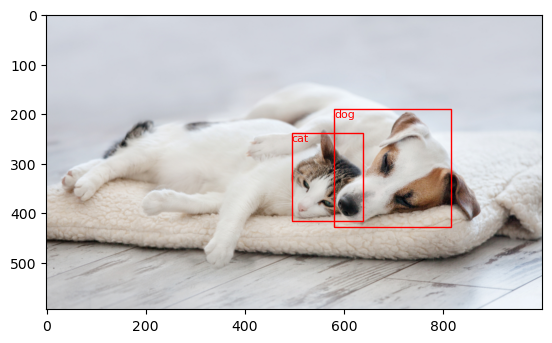

In [8]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Path to the JSON file
json_file = 'cat_dog_annotation.json'

# Load JSON data
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Specify the path to the images
image_folder = r'C:\Users\Faisal\Downloads\Compressed\cat_dog\cat_dog'

# Iterate over images in the JSON data
for image_id, image_data in json_data['_via_img_metadata'].items():
    # Load image
    image_filename = image_data['filename']
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Get bounding box information for the current image
    regions = image_data['regions']

    # Draw bounding boxes on the image
    for region in regions:
        label_name = region['region_attributes']['name']
        x = region['shape_attributes']['x']
        y = region['shape_attributes']['y']
        width = region['shape_attributes']['width']
        height = region['shape_attributes']['height']

        # Create a rectangle patch
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the current axes
        ax.add_patch(rect)

        # Add label text near the bounding box
        ax.text(x, y, label_name, color='r', fontsize=8, verticalalignment='top')

    # Show the image with bounding boxes
    plt.show()

In [10]:
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random
import numpy as np
from PIL import Image, ImageEnhance

# Path to the JSON file
json_file = 'cat_dog_annotation.json'

# Load JSON data
with open(json_file, 'r') as f:
    json_data = json.load(f)

# Specify the path to the images
image_folder = r'C:\Users\Faisal\Downloads\Compressed\cat_dog\cat_dog'

# Specify the output directory for augmented images
output_folder = r'C:\Users\Faisal\Downloads\Compressed\cat_dog\augmented_images'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to rotate the image and save augmented images
def augment_rotation(image, filename):
    for angle in range(5, 360, 5):
        rotated_image = image.rotate(angle)
        rotated_filename = os.path.splitext(filename)[0] + f"_{angle}degree.jpg"
        rotated_image.save(os.path.join(output_folder, rotated_filename))

# Function to adjust brightness and save augmented images
def augment_brightness(image, filename):
    for _ in range(5):
        brightness_factor = random.uniform(0.5, 1.5)
        brightened_image = ImageEnhance.Brightness(image).enhance(brightness_factor)
        brightened_filename = os.path.splitext(filename)[0] + f"_brightness{_}.jpg"
        brightened_image.save(os.path.join(output_folder, brightened_filename))

# Function to add noise and save augmented images
def augment_noise(image, filename):
    for _ in range(5):
        noise_factor = random.uniform(0.05, 0.2)
        noisy_image = np.array(image)
        noise = np.random.normal(scale=noise_factor, size=noisy_image.shape).astype(np.uint8)
        noisy_image = np.clip(noisy_image + noise, 0, 255)
        noisy_image = Image.fromarray(noisy_image)
        noisy_filename = os.path.splitext(filename)[0] + f"_noise{_}.jpg"
        noisy_image.save(os.path.join(output_folder, noisy_filename))

# Iterate over images in the JSON data
for image_id, image_data in json_data['_via_img_metadata'].items():
    # Load image
    image_filename = image_data['filename']
    image_path = os.path.join(image_folder, image_filename)
    image = Image.open(image_path)

    # Augment rotation
    augment_rotation(image, image_filename)

    # Augment brightness
    augment_brightness(image, image_filename)

    # Augment noise
    augment_noise(image, image_filename)
